In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from bpi_fr_algo_credit_scoring.reader import read_yearly_data
from bpi_fr_algo_credit_scoring.data_pipeline import clean_dataset

In [2]:
import shap
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
# Dataset for SHAP analysis
def dataset_for_shap():
    default_risk_dataset = read_yearly_data(
        path=Path.joinpath(Path(os.getcwd()).parent, "data"), 
        default_year=1
        )
    cleaned_default_risk = clean_dataset(
        default_risk_dataset,
        ratio_na_per_features=0.05,
        nb_na_sample_threshold=0,
        ratio_under_oversampled=0.2
    )
    return cleaned_default_risk

df_shap = dataset_for_shap()

In [4]:
# SHAP study
X = df_shap.drop('X_65', axis=1)
y = df_shap['X_65']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_shap = DecisionTreeClassifier()
model_shap.fit(X_train, y_train)

explainer = shap.Explainer(model_shap)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


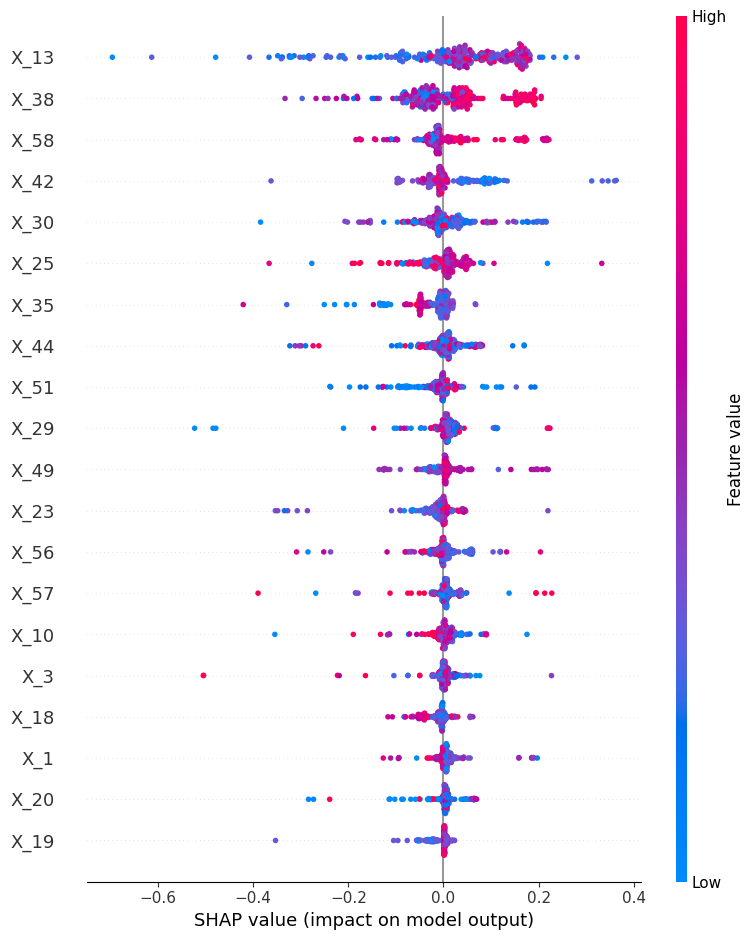

In [6]:
shap.summary_plot(shap_values[0], X_test)

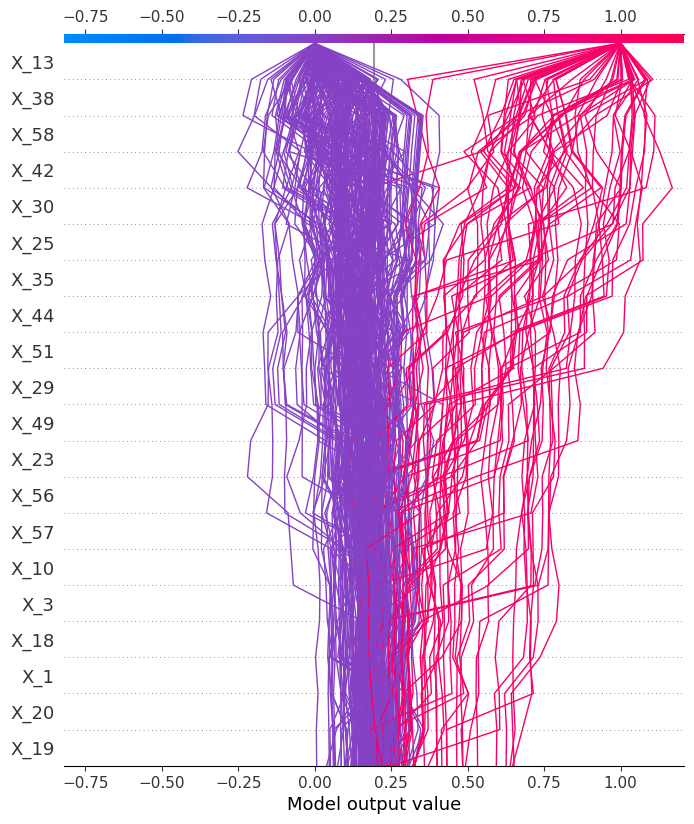

In [7]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

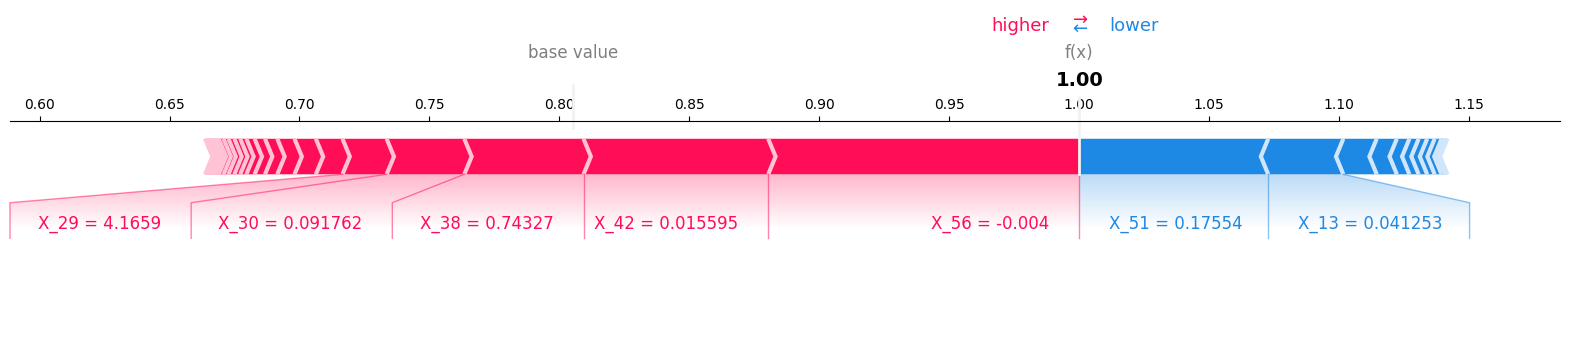

In [8]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

In [9]:
shap.waterfall_plot(shap_values[0])

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.